In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

d2 = pd.read_csv("d2_trabalhadoDrop.csv", sep=',')

In [69]:
dropout_students = d2[d2['dropout'] == 1]

In [76]:
# Filtrar os alunos que abandonaram a matéria (dropout == 1)
dropout_students = d2[d2['dropout'] == 1]

# Filtrar os alunos que não abandonaram a matéria (dropout == 0)
non_dropout_students = d2[d2['dropout'] == 0]

# Comparar as características
comparison = {}
for feature in ['G3', 'G2', 'G1', 'failures', 'absences', 'age', 'studytime', 'goout', 'famsup', 'Fedu']:
    comparison[feature] = {
        'dropout': dropout_students[feature].describe(),
        'non_dropout': non_dropout_students[feature].describe()
    }

# Imprimir a comparação
for feature, stats in comparison.items():
    print(f"\nComparação de {feature}:")
    print(f"Alunos que abandonaram:\n{stats['dropout']}")
    print(f"Alunos que não abandonaram:\n{stats['non_dropout']}")



Comparação de G3:
Alunos que abandonaram:
count    15.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: G3, dtype: float64
Alunos que não abandonaram:
count    634.000000
mean      12.187697
std        2.691824
min        1.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

Comparação de G2:
Alunos que abandonaram:
count    15.000000
mean      3.800000
std       3.783422
min       0.000000
25%       0.000000
50%       5.000000
75%       7.000000
max       9.000000
Name: G2, dtype: float64
Alunos que não abandonaram:
count    634.000000
mean      11.753943
std        2.628563
min        5.000000
25%       10.000000
50%       12.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64

Comparação de G1:
Alunos que abandonaram:
count    15.000000
mean      7.066667
std       1.791514
min       4.000000
25%       6.000000
50%       7.000000
75%       8.00000

In [77]:
from scipy.stats import ttest_ind

# Comparar características contínuas usando o teste t
for feature in ['G3', 'G2', 'G1', 'failures', 'absences', 'age', 'studytime']:
    dropout_values = dropout_students[feature]
    non_dropout_values = non_dropout_students[feature]
    t_stat, p_value = ttest_ind(dropout_values, non_dropout_values, equal_var=False)  # equal_var=False para variâncias desiguais
    print(f"\nTeste t para {feature}:")
    print(f"Estatística t: {t_stat:.4f}, Valor p: {p_value:.4f}")



Teste t para G3:
Estatística t: -114.0039, Valor p: 0.0000

Teste t para G2:
Estatística t: -8.0961, Valor p: 0.0000

Teste t para G1:
Estatística t: -9.3432, Valor p: 0.0000

Teste t para failures:
Estatística t: 2.6452, Valor p: 0.0189

Teste t para absences:
Estatística t: -20.2380, Valor p: 0.0000

Teste t para age:
Estatística t: 4.3626, Valor p: 0.0005

Teste t para studytime:
Estatística t: -3.4576, Valor p: 0.0033


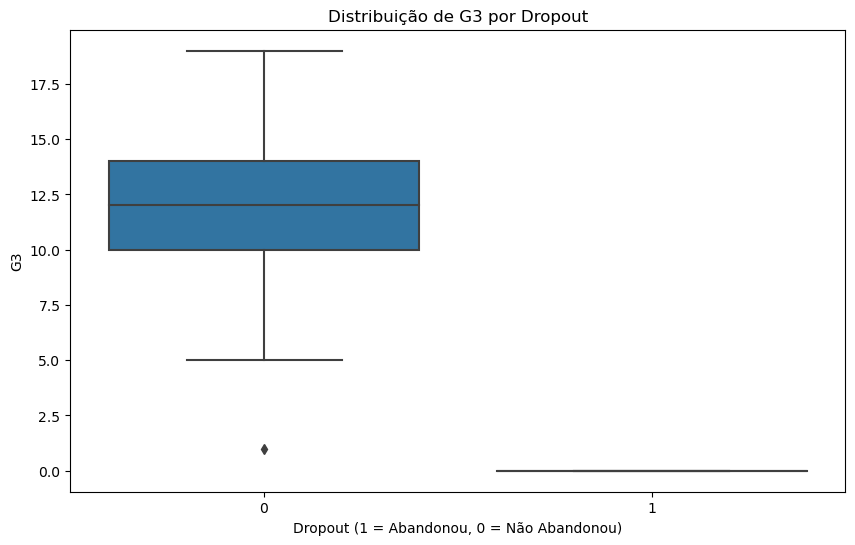

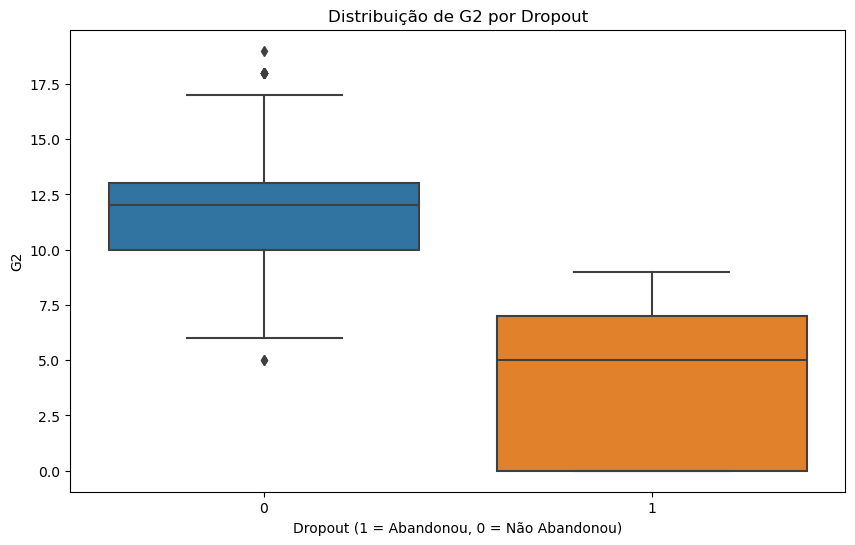

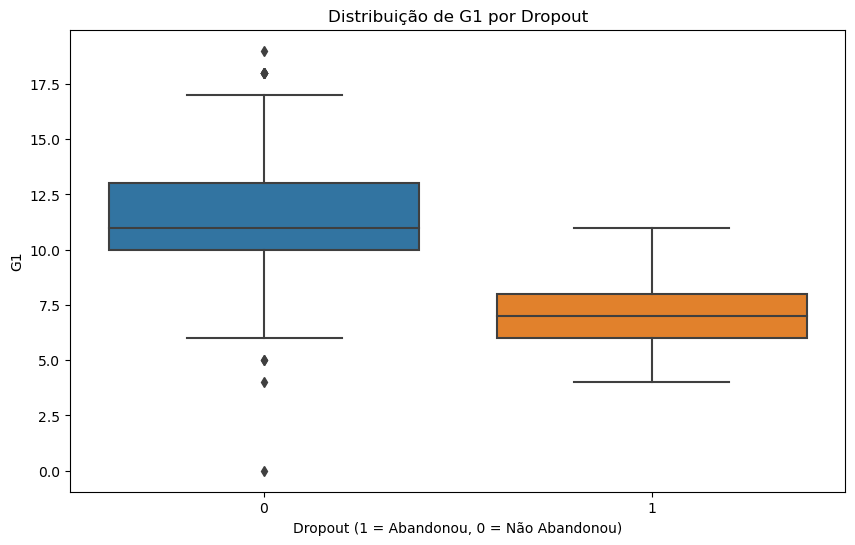

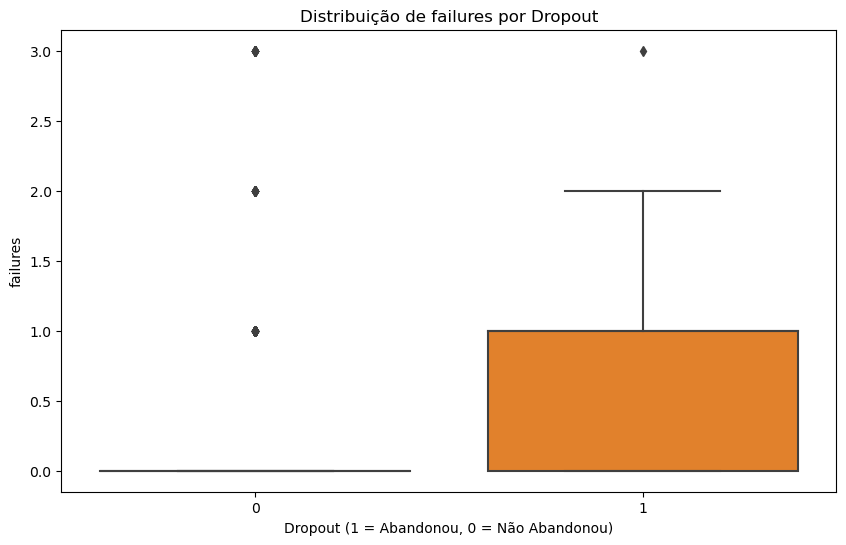

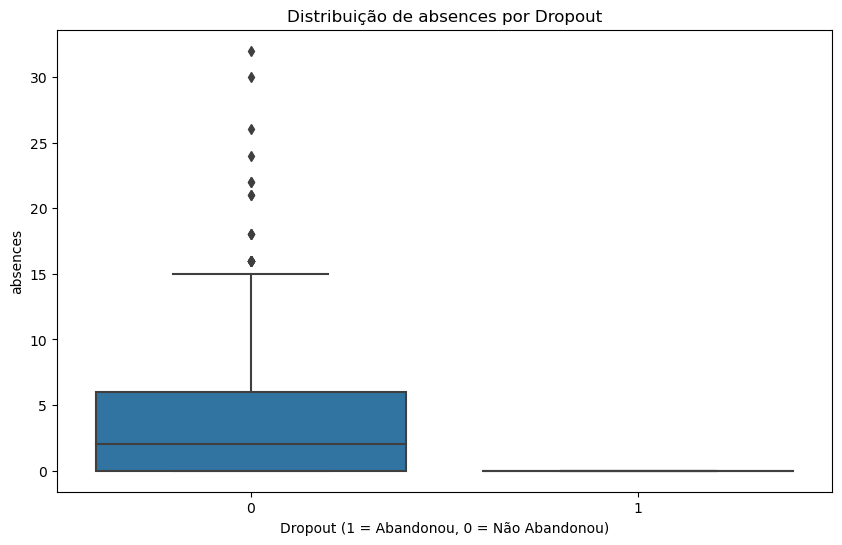

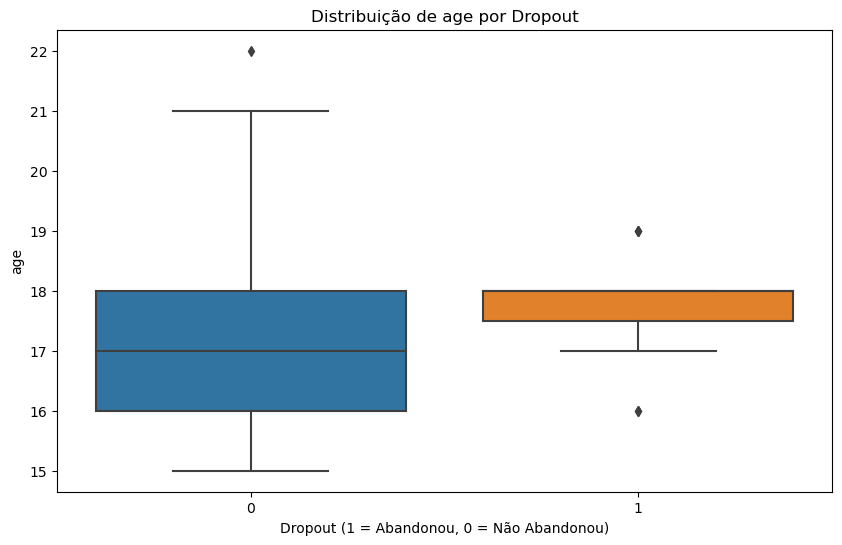

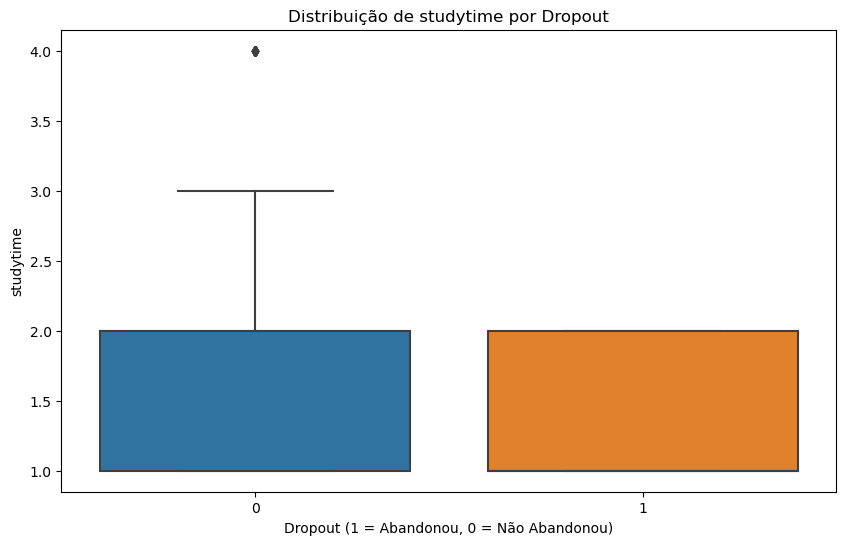

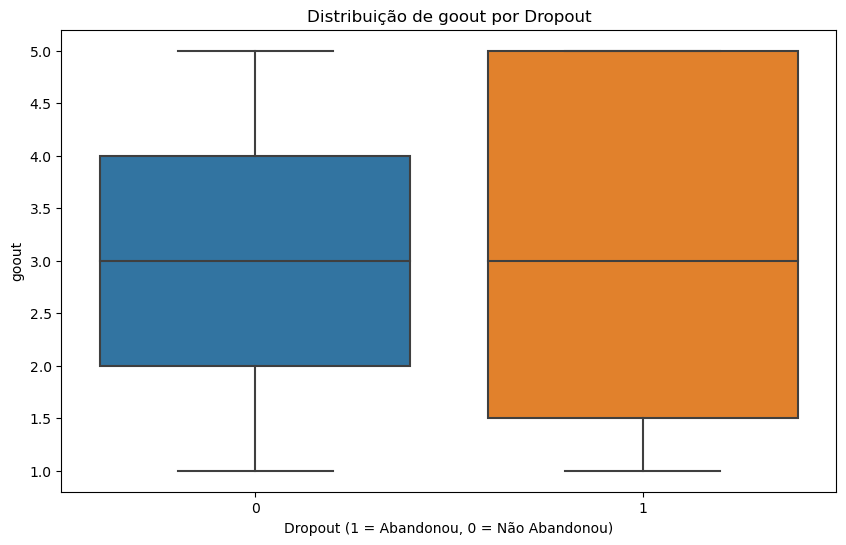

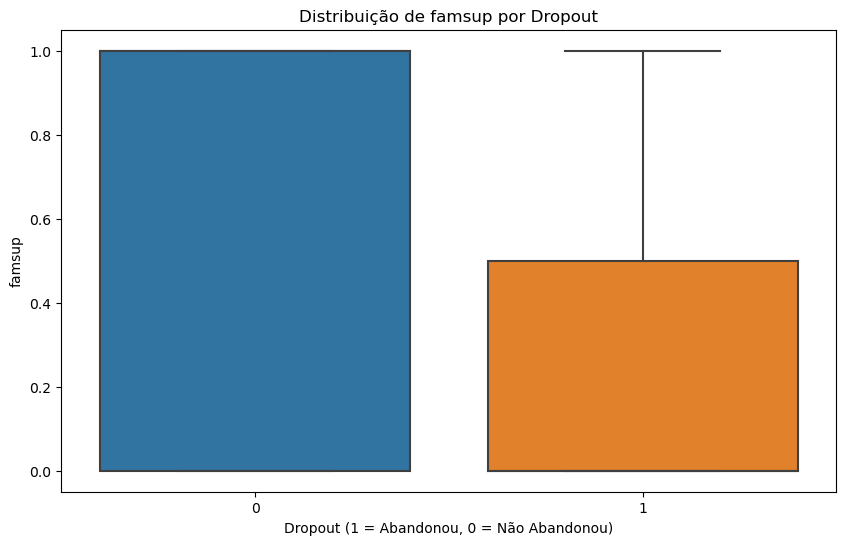

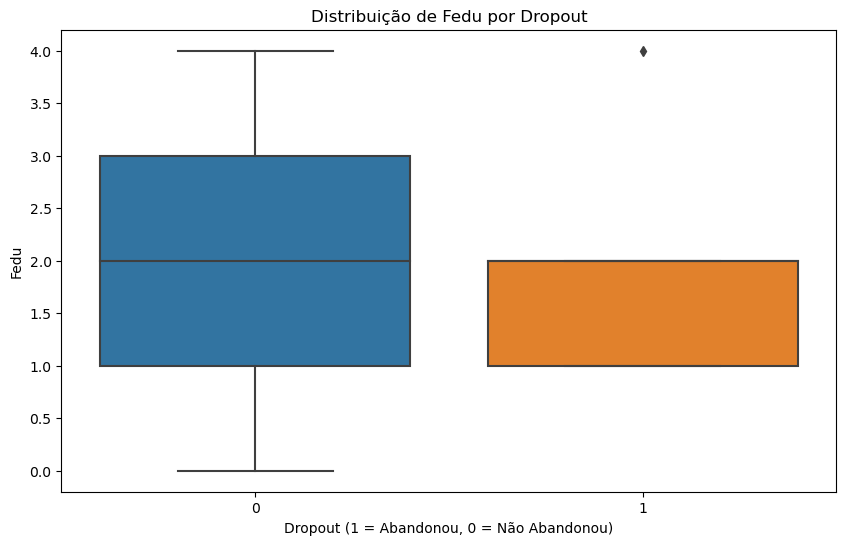

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criação de gráficos para comparação
features_to_plot = ['G3', 'G2', 'G1', 'failures', 'absences', 'age', 'studytime', 'goout', 'famsup', 'Fedu']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='dropout', y=feature, data=d2)
    plt.title(f'Distribuição de {feature} por Dropout')
    plt.xlabel('Dropout (1 = Abandonou, 0 = Não Abandonou)')
    plt.ylabel(feature)
    plt.show()


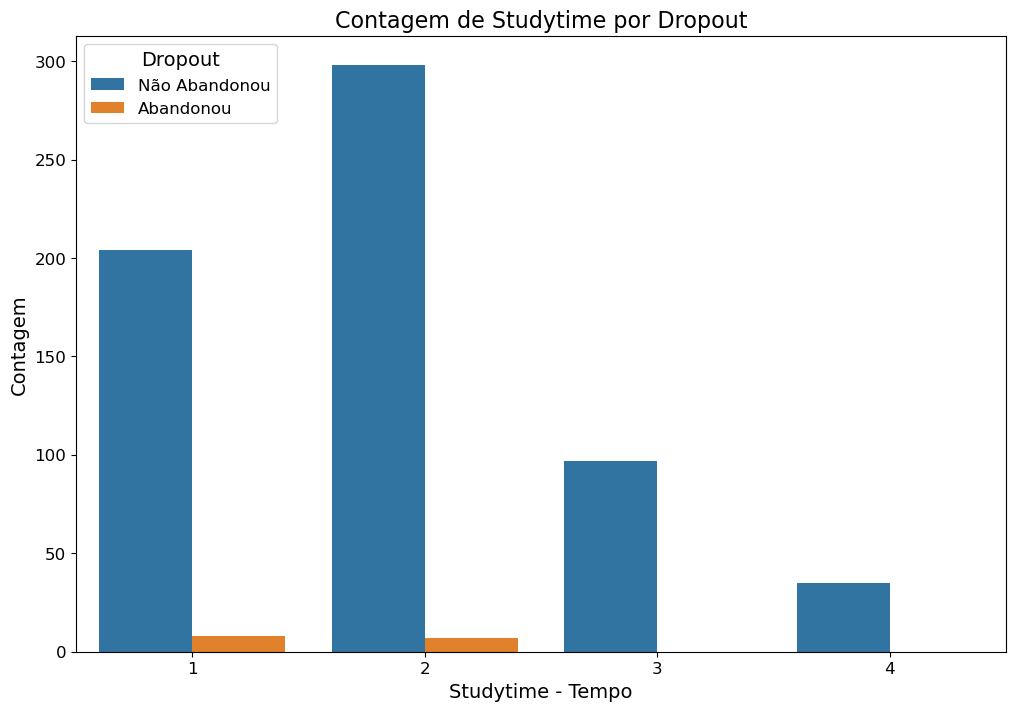

In [103]:
plt.figure(figsize=(12, 8))
sns.countplot(x='studytime', hue='dropout', data=d2)
plt.title('Contagem de Studytime por Dropout', fontsize=16)
plt.xlabel('Studytime - Tempo' , fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Dropout', labels=['Não Abandonou', 'Abandonou'])
plt.show()


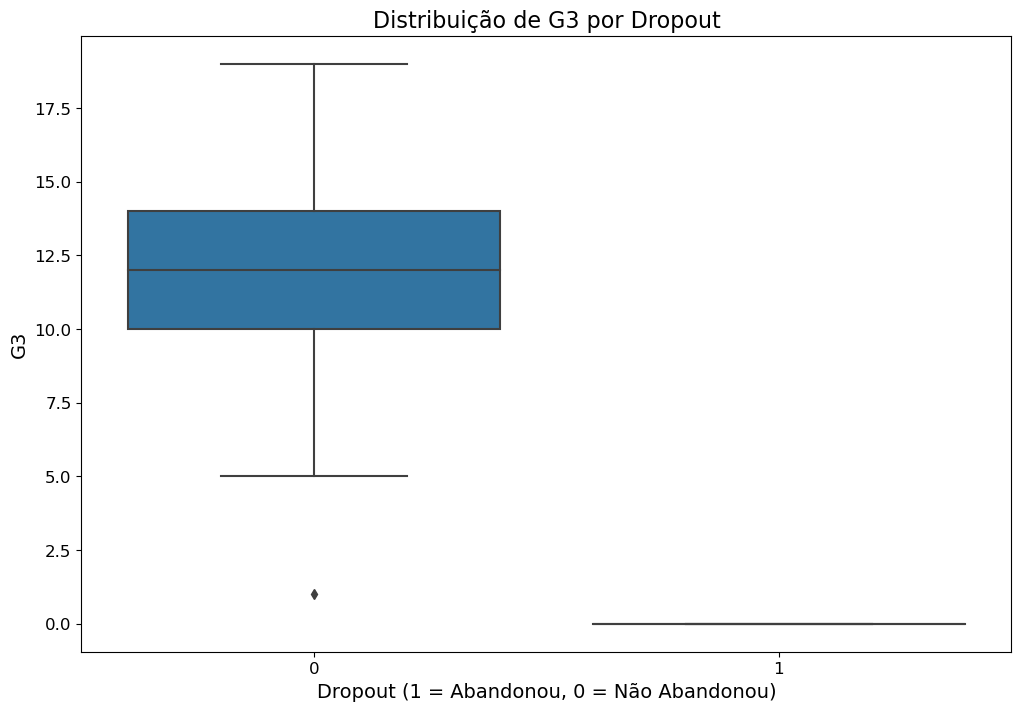

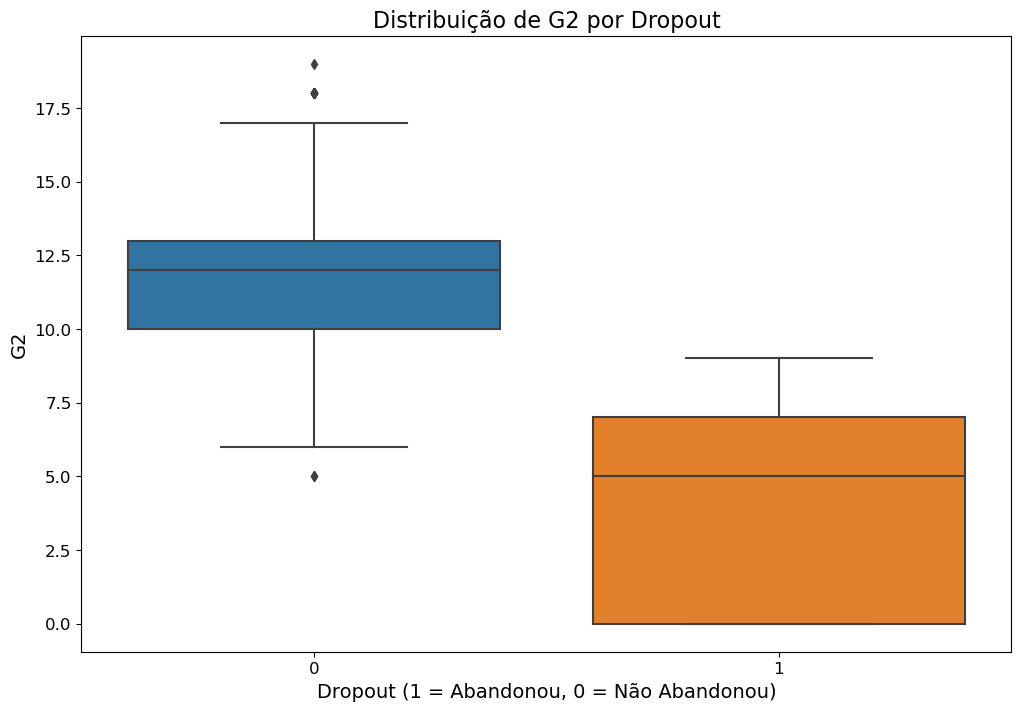

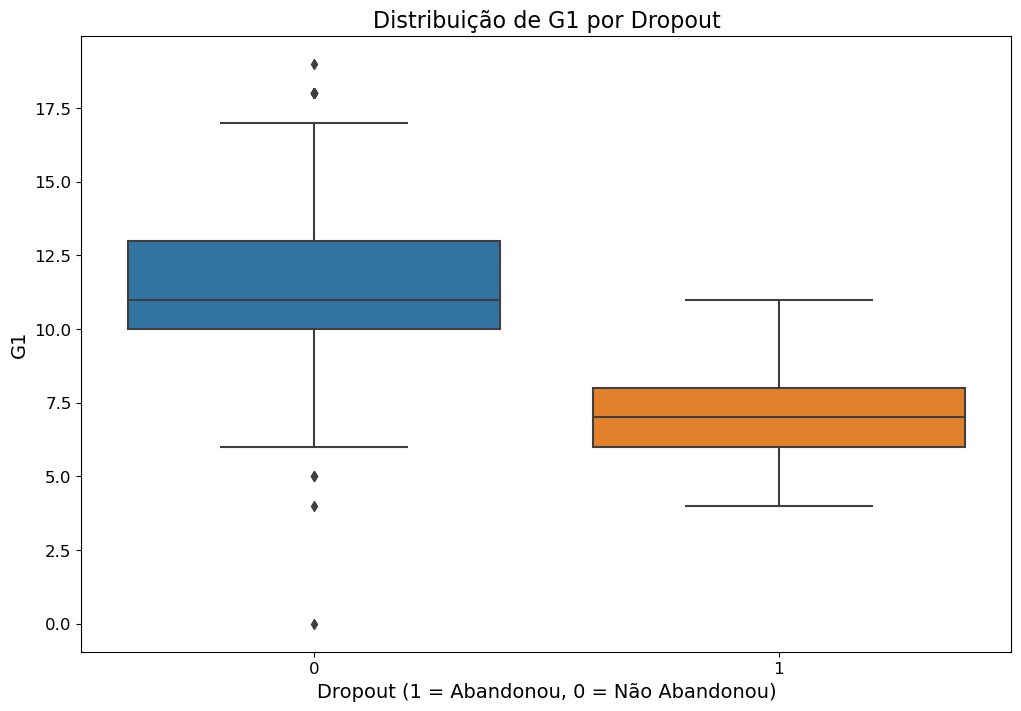

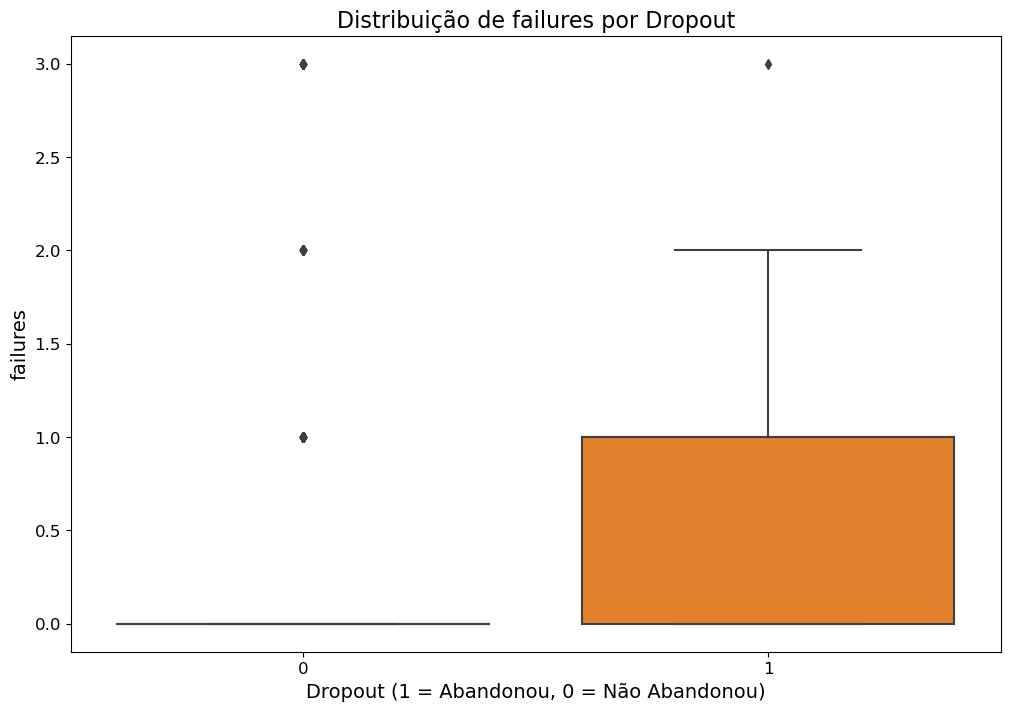

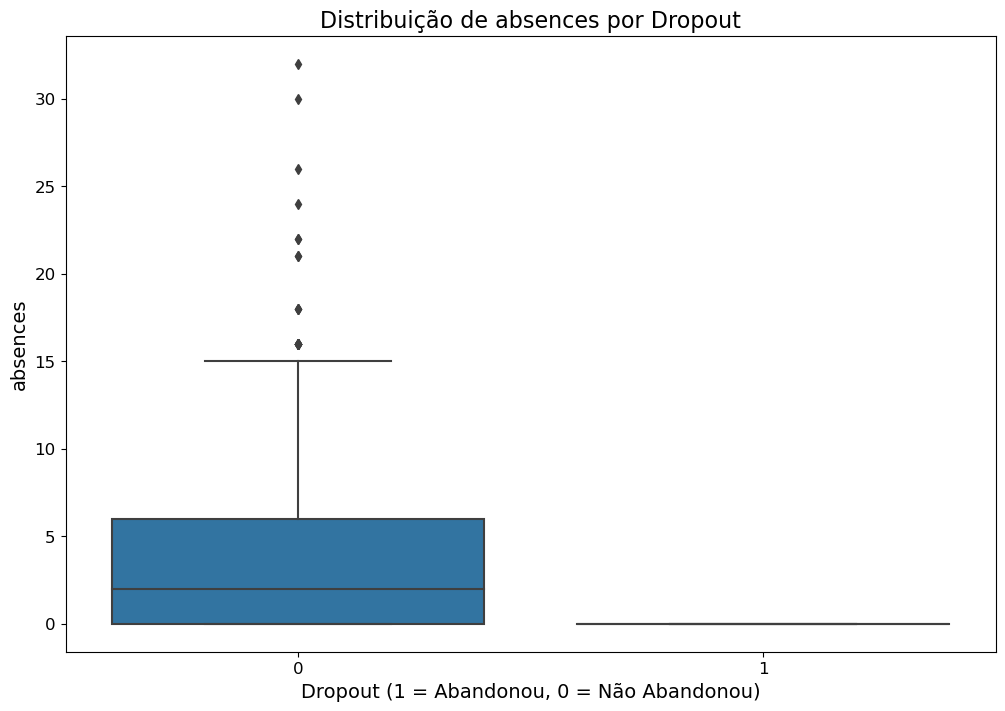

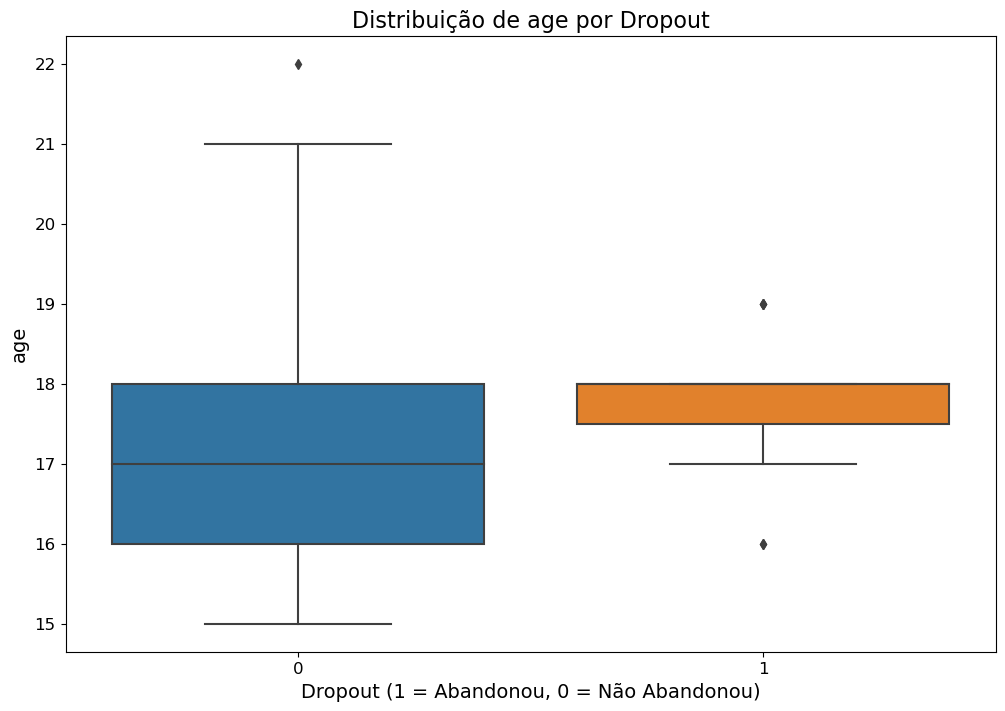

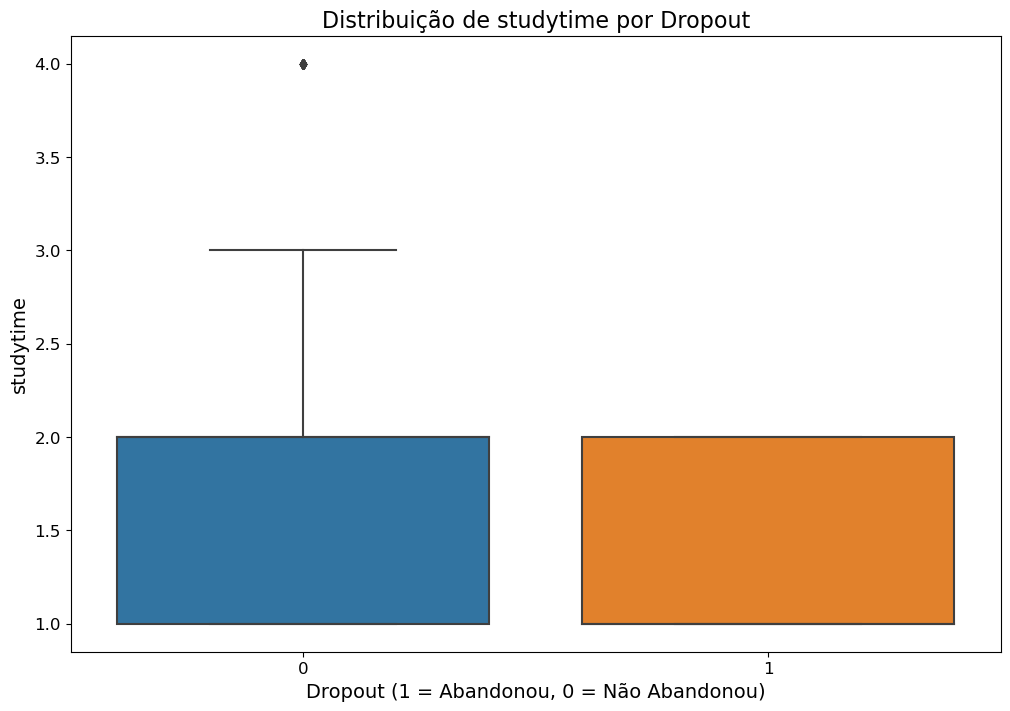

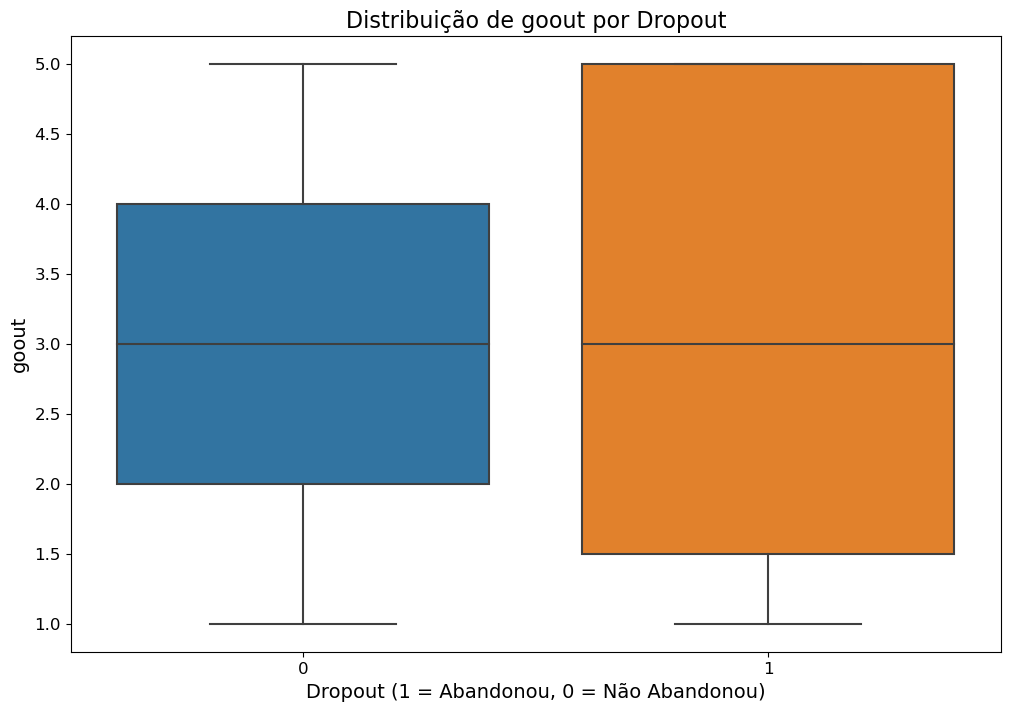

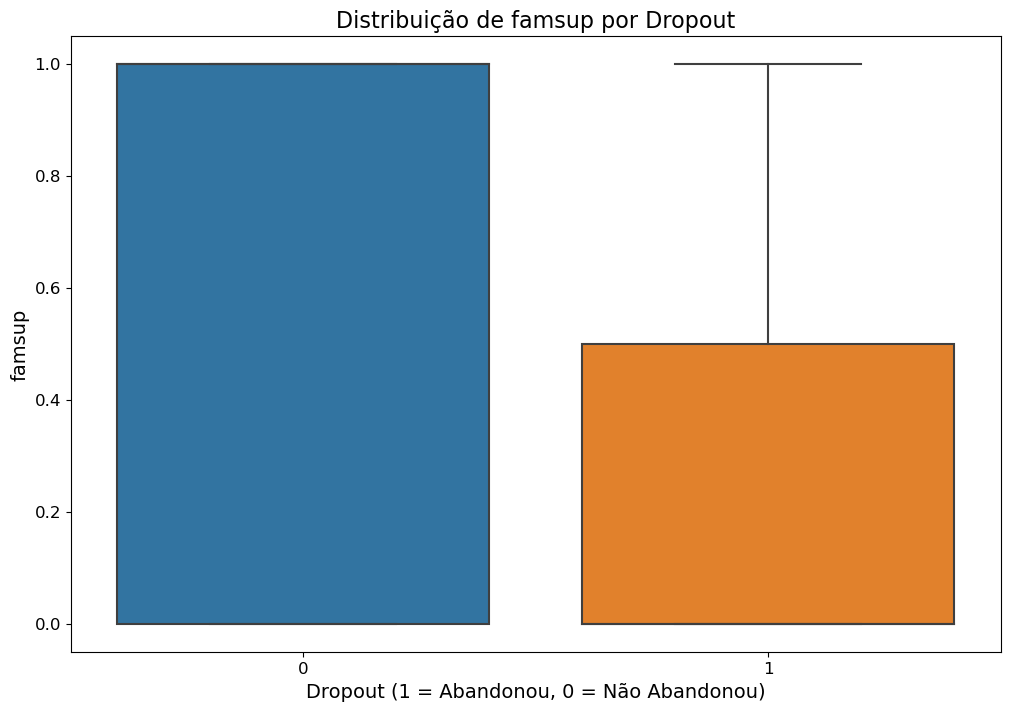

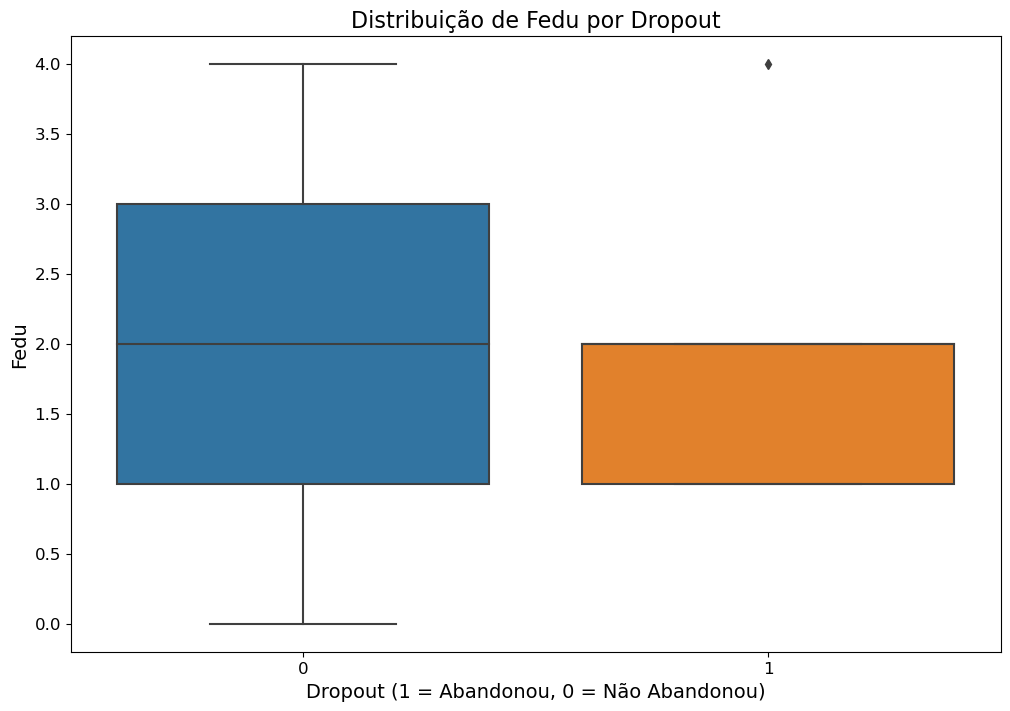

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir o tamanho da fonte
plt.rc('font', size=14)          # Tamanho da fonte do texto
plt.rc('axes', titlesize=16)     # Tamanho da fonte do título dos eixos
plt.rc('axes', labelsize=14)     # Tamanho da fonte dos rótulos dos eixos
plt.rc('xtick', labelsize=12)    # Tamanho da fonte dos rótulos dos ticks do eixo x
plt.rc('ytick', labelsize=12)    # Tamanho da fonte dos rótulos dos ticks do eixo y
plt.rc('legend', fontsize=12)    # Tamanho da fonte da legenda

# Criação de gráficos para comparação
features_to_plot = ['G3', 'G2', 'G1', 'failures', 'absences', 'age', 'studytime', 'goout', 'famsup', 'Fedu']

for feature in features_to_plot:
    plt.figure(figsize=(12, 8))  # Ajustar o tamanho da figura se necessário
    sns.boxplot(x='dropout', y=feature, data=d2)
    plt.title(f'Distribuição de {feature} por Dropout')
    plt.xlabel('Dropout (1 = Abandonou, 0 = Não Abandonou)')
    plt.ylabel(feature)
    plt.show()
